In [2]:
import cv2
import matplotlib.pyplot as plt

In [5]:
config_file = "/Users/animeshkumarnayak/notebooks/ssd_mobile net/ssd_mobilenet_v3_large_.pbtxt"
model_file = "/Users/animeshkumarnayak/notebooks/ssd_mobile net/frozen_inference_graph.pb"

In [6]:
model = cv2.dnn_DetectionModel(model_file,config_file)



In [5]:
class_labels = []
file_name="coco.txt"
with open(file_name,"rt") as fpt:
    class_labels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(len(class_labels))

91


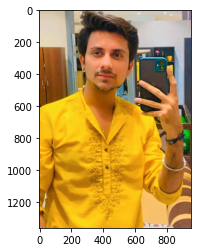

In [7]:
img=cv2.imread("aakash.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x10dc95150>

In [9]:
ClassIndex,confidece,bbox = model.detect(img)
print(ClassIndex)

[ 1 77]


In [10]:
font_scale=3
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,255,0),2)
    cv2.putText(img,class_labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,255,0),thickness=3)

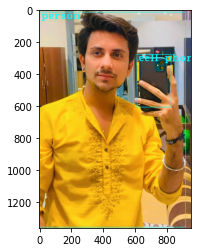

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("fd.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot Open cam")
    
font_scale=3
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
while True:
    ret,frame = cap.read()
    ClassIndex,confidece,bbox = model.detect(frame)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (len(ClassIndex)<=91):
                cv2.rectangle(img,boxes,(255,255,0),2)
                cv2.putText(img,class_labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,255,0),thickness=3)


    cv2.imshow("Application", frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
    

    

[1]
[1]
[1]
[ 1 13]
[ 1 13]
[13]
[13]
[13]
[13]
[13]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[13  1]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[1]
[1]
[1 1]
[1]
[ 1  1 61]
[ 1 84]
[84  1]
()
()
[84]
[84]
()
()
[84]
[28 84]
[65]
[84]
[84]
[28]
[ 1 84]
[84  1]
[84]
[84]
[84]
[84  1]
[84]
[84]
[84]
[84]
[84 60]
[60 84]
()
[84 84]
[84 84]
()
[84]
()
()
[60 60]
()
[61 86]
()
[60]
[60 61]
()
()
[61]
()
()
()
()
[60]
[47]
()
[60]
()
()
[60]
[60]
[60 60]
[60 60]
()
[60]
[60 60]
()
()
()
()
()
()
()
()
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[67]
[51 61 67]
[51 61 67]
[51 61 67]
[51 61 67]
[51 61 67]
[51 61 67]
[51 61 67]


In [8]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("fd.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot Open cam")
    
    
total_frames = 0    
font_scale=3
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
while True:
    ret,frame = cap.read()
    total_frames = total_frames + 1
    (H, W) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (W, H), 127.5)

    #model.setInput(blob)
    person_detections = model.forward()

    for i in np.arange(0, person_detections.shape[2]):
        confidence = person_detections[0, 0, i, 2]
        if confidence > 0.5:
            idx = int(person_detections[0, 0, i, 1])

            if CLASSES[idx] != "person":
                continue

            person_box = person_detections[0, 0, i, 3:7] * np.array([W, H, W, H])
            (startX, startY, endX, endY) = person_box.astype("int")

            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)


    
    """ClassIndex,confidece,bbox = model.detect(frame)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (len(ClassIndex)<=91):
                cv2.rectangle(img,boxes,(255,255,0),2)
                cv2.putText(img,class_labels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,255,0),thickness=3)
"""

    cv2.imshow("Application", frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

AttributeError: 'cv2.dnn_DetectionModel' object has no attribute 'forward'

In [2]:
config_file = "/Users/animeshkumarnayak/notebooks/ssd_mobile net/ssd_mobilenet_v3_large_.pbtxt"
model_file = "/Users/animeshkumarnayak/notebooks/ssd_mobile net/frozen_inference_graph.pb"